In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define Functions #


In [ ]:
"""
Categorize the labels from a pandas Series
"""
def categorize(labels):
  # Sort the data
  total_labels = np.sort(labels.unique())

  # Map the labels 
  mapping = {}
  for x in range(len(total_labels)):
    mapping[total_labels[x]] = x
  
  # Change the series into a numpy array
  numpy_temp = pd.Series(labels).to_numpy()

  # get a new array without the keys
  for x in range(len(numpy_temp)):
    numpy_temp[x] = mapping[numpy_temp[x]]

  return numpy_temp

In [ ]:
def redefine(array):
  count = 0
  for i in array:
    if i <= 10:
      array[count] = 0
    elif 10 < i <= 20:
      array[count] = 1
    elif 20 < i <= 30:
      array[count] = 2
    elif 30 < i <= 40:
      array[count] = 3
    elif 40 < i <= 50:
      array[count] = 4
    elif i > 50:
      array[count] = 5
    count += 1
  #print(array)
  return array

#Obtain data

In [ ]:
D = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ECE539_FinalProject/parkinsons_updrs.csv")

In [ ]:
# get the labels of the columns we want to use
y_total = D["total_UPDRS"]
y_motor = D["motor_UPDRS"]
# Remove the unwanted columns from the data set
X = D.drop(["total_UPDRS","motor_UPDRS", "subject#"], axis=1)
# Round the values
y_total = y_total.round(0)
y_motor = y_motor.round(0)

In [ ]:
y_total = redefine(y_total)
y_motor = redefine(y_motor)

## Normalize Data

In [ ]:
X = (X - X.mean())/X.std()

#Reduce dataset and split into Total and Motor UPDRS train and test sets

In [ ]:
X_use_total, X_notused, y_used_total, y_notused = train_test_split(X, y_total, train_size = 0.05)

# train and test split for total updrs
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y_total, train_size = 0.8, stratify = y_total)

In [ ]:
X_use_motor, X_notused, y_used_motor, y_notused = train_test_split(X, y_motor, train_size = 0.05)

# train and test split for motor updrs
X_train_motor, X_test_motor, y_train_motor, y_test_motor = train_test_split(X, y_motor, train_size = 0.8, stratify=y_motor)

#Multilayer Perceptron


#Total UPDRS

*One hot encoding*

In [ ]:
y_train_total = keras.utils.to_categorical(categorize(y_train_total))
y_test_total = keras.utils.to_categorical(categorize(y_test_total))

In [ ]:
# create keras model with 19-30-30-44 configuration with relu and softmax activation
total = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=19, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])


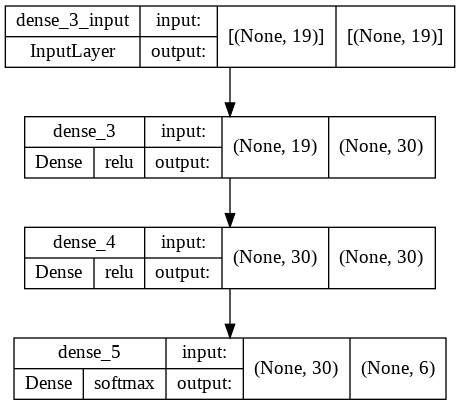

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(total, show_shapes=True, show_layer_names=True, show_layer_activations=True )

In [ ]:
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
total.compile(loss='binary_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

In [ ]:
# fit the keras model on the total dataset
history = total.fit(X_train_total, y_train_total, epochs=150, batch_size=30, validation_data=[X_test_total, y_test_total])

Epoch 1/150
157/157 [==============================] - 4s 15ms/step - loss: 0.3557 - accuracy: 0.4615 - val_loss: 0.3012 - val_accuracy: 0.5566
Epoch 2/150
157/157 [==============================] - 1s 5ms/step - loss: 0.2898 - accuracy: 0.5700 - val_loss: 0.2818 - val_accuracy: 0.5932
Epoch 3/150
157/157 [==============================] - 1s 5ms/step - loss: 0.2622 - accuracy: 0.6336 - val_loss: 0.2585 - val_accuracy: 0.6417
Epoch 4/150
157/157 [==============================] - 1s 5ms/step - loss: 0.2427 - accuracy: 0.6653 - val_loss: 0.2520 - val_accuracy: 0.6766
Epoch 5/150
157/157 [==============================] - 1s 5ms/step - loss: 0.2284 - accuracy: 0.6896 - val_loss: 0.2270 - val_accuracy: 0.6996
Epoch 6/150
157/157 [==============================] - 1s 5ms/step - loss: 0.2118 - accuracy: 0.7202 - val_loss: 0.2162 - val_accuracy: 0.7166
Epoch 7/150
157/157 [==============================] - 1s 5ms/step - loss: 0.2040 - accuracy: 0.7353 - val_loss: 0.2007 - val_accuracy: 0.743

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

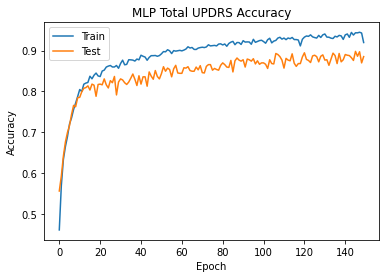

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('MLP Total UPDRS Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

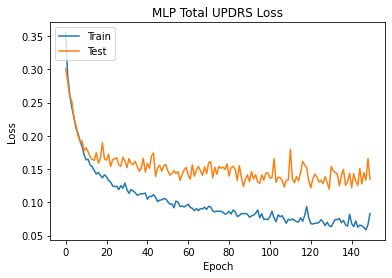

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Total UPDRS Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Motor UPDRS

In [ ]:
y_train_motor = keras.utils.to_categorical(categorize(y_train_motor))
y_test_motor = keras.utils.to_categorical(categorize(y_test_motor))

In [ ]:
# create keras model with 19-30-30-33 configuration with relu and softmax activation
motor = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=19, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])

In [ ]:
# compile the keras model
motor.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
# fit the keras model on the total dataset
history1 = motor.fit(X_train_motor, y_train_motor, epochs=150, batch_size=30, validation_data =[X_test_motor, y_test_motor])

Epoch 1/150
157/157 [==============================] - 3s 10ms/step - loss: 0.5356 - accuracy: 0.4236 - val_loss: 0.4905 - val_accuracy: 0.4528
Epoch 2/150
157/157 [==============================] - 1s 5ms/step - loss: 0.4762 - accuracy: 0.4685 - val_loss: 0.4636 - val_accuracy: 0.4945
Epoch 3/150
157/157 [==============================] - 1s 5ms/step - loss: 0.4516 - accuracy: 0.5162 - val_loss: 0.4422 - val_accuracy: 0.5234
Epoch 4/150
157/157 [==============================] - 1s 5ms/step - loss: 0.4287 - accuracy: 0.5623 - val_loss: 0.4209 - val_accuracy: 0.5677
Epoch 5/150
157/157 [==============================] - 1s 5ms/step - loss: 0.4057 - accuracy: 0.5987 - val_loss: 0.4011 - val_accuracy: 0.5864
Epoch 6/150
157/157 [==============================] - 1s 5ms/step - loss: 0.3844 - accuracy: 0.6326 - val_loss: 0.3834 - val_accuracy: 0.6162
Epoch 7/150
157/157 [==============================] - 1s 5ms/step - loss: 0.3670 - accuracy: 0.6572 - val_loss: 0.3728 - val_accuracy: 0.641

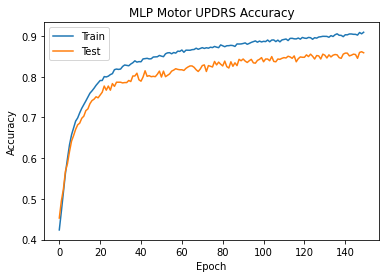

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('MLP Motor UPDRS Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

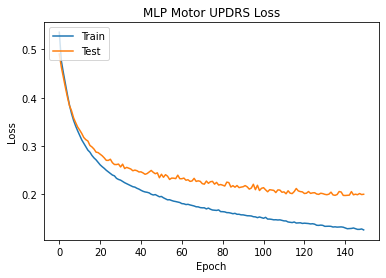

In [ ]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('MLP Motor UPDRS Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Confusion Matrix

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_classified, y_true, unique):
  # Compute confusion matrix
  c_mat = np.zeros((len(unique),len(unique)))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')

#Use a Binary Classifier 

In [ ]:
def label_binary(label, array):
  for i in range(len(array)):
    if(array[i] == label):
      array[i] = 1
    else:
      array[i] = 0
  return array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_total, train_size = 0.8)

In [ ]:
y_test_conv = label_binary(32, np.array(y_test))
y_train_conv = label_binary(32, np.array(y_train))

In [ ]:
y_train_motor = keras.utils.to_categorical(categorize(y_train_conv))
y_test_motor = keras.utils.to_categorical(categorize(y_test_conv))

AttributeError: ignored

In [ ]:
# create keras model with 19-30-30-33 configuration with relu and softmax activation
motor = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=19, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense((y_train_motor).shape[1], activation='softmax')])

In [ ]:
# compile the keras model
motor.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
# fit the keras model on the total dataset
history1 = motor.fit(X_train_motor, y_train_motor, epochs=150, batch_size=10)

Epoch 1/150
24/24 [==============================] - 1s 3ms/step - loss: 0.6469 - accuracy: 0.0513
Epoch 2/150
24/24 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.0641
Epoch 3/150
24/24 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.0598
Epoch 4/150
24/24 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.0598
Epoch 5/150
24/24 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.0513
Epoch 6/150
24/24 [==============================] - 0s 3ms/step - loss: 0.1536 - accuracy: 0.0641
Epoch 7/150
24/24 [==============================] - 0s 3ms/step - loss: 0.1468 - accuracy: 0.0641
Epoch 8/150
24/24 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.0940
Epoch 9/150
24/24 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 0.0940
Epoch 10/150
24/24 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.1026
Epoch 11/

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.title('MLP Motor UPDRS Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Evaluate Total UPDRS Model

Test loss: 0.18329855799674988
Test accuracy: 0.8680850863456726



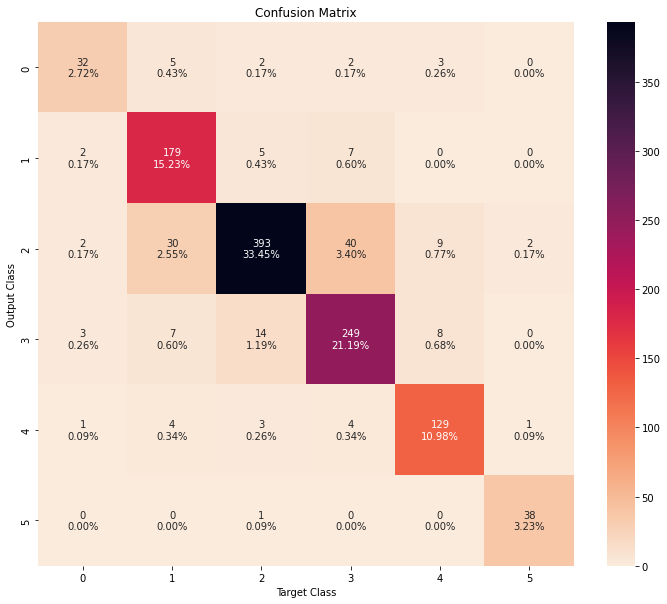

In [ ]:
score = total.evaluate(X_test_total, y_test_total, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
y_classified = np.argmax(total.predict(X_test_total), axis=1)
y_true = np.argmax(y_test_total, axis=1)
plot_confusion_matrix(y_classified, y_true, np.unique(y_total))
print()